In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
sai = pd.read_csv("C:\\Users\\kodum\\Downloads\\playgolf_data.csv")
sai

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [5]:
sai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   PlayGolf     14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


In [7]:
sai.head()

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes


In [9]:
sai.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Wind           0
PlayGolf       0
dtype: int64

In [11]:
sai1=sai.copy()

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in sai.columns:
    sai[col] = le.fit_transform(sai[col])
    sai[col] = sai[col].astype('category')

In [17]:
sai

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [19]:
sai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Outlook      14 non-null     category
 1   Temperature  14 non-null     category
 2   Humidity     14 non-null     category
 3   Wind         14 non-null     category
 4   PlayGolf     14 non-null     category
dtypes: category(5)
memory usage: 710.0 bytes


In [21]:
#DIVIDE X AND Y VARIABLES
x = sai.drop(['PlayGolf'], axis=1)
x

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [23]:
y = sai['PlayGolf']
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: PlayGolf, dtype: category
Categories (2, int32): [0, 1]

In [25]:
#SPLIT X AND Y INTO TRAINING AND TESTING SETS
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
x_train.shape

(11, 4)

In [29]:
x_train.size

44

In [31]:
x_test.shape

(3, 4)

In [33]:
x_test.size

12

In [35]:
y_train.shape

(11,)

In [37]:
y_train.size

11

In [39]:
y_test.shape

(3,)

In [41]:
y_test.size

3

In [43]:
#MODEL BUILDING 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf = clf.fit(x,y)

In [45]:
#PREDICTIONS
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 0])

In [49]:
#PERFORMANCE EVALUATION
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, y_pred)

1.0

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



<Axes: >

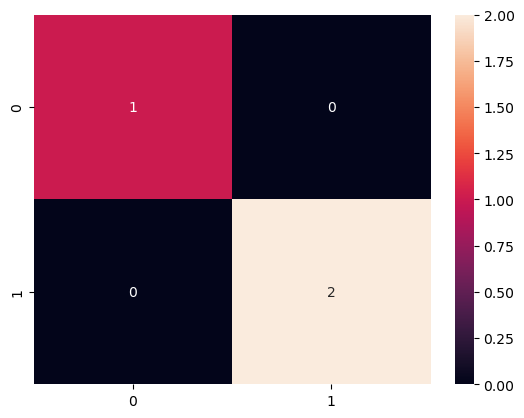

In [53]:
import seaborn as sns
sns.heatmap(data = confusion_matrix(y_test, y_pred), annot=True)

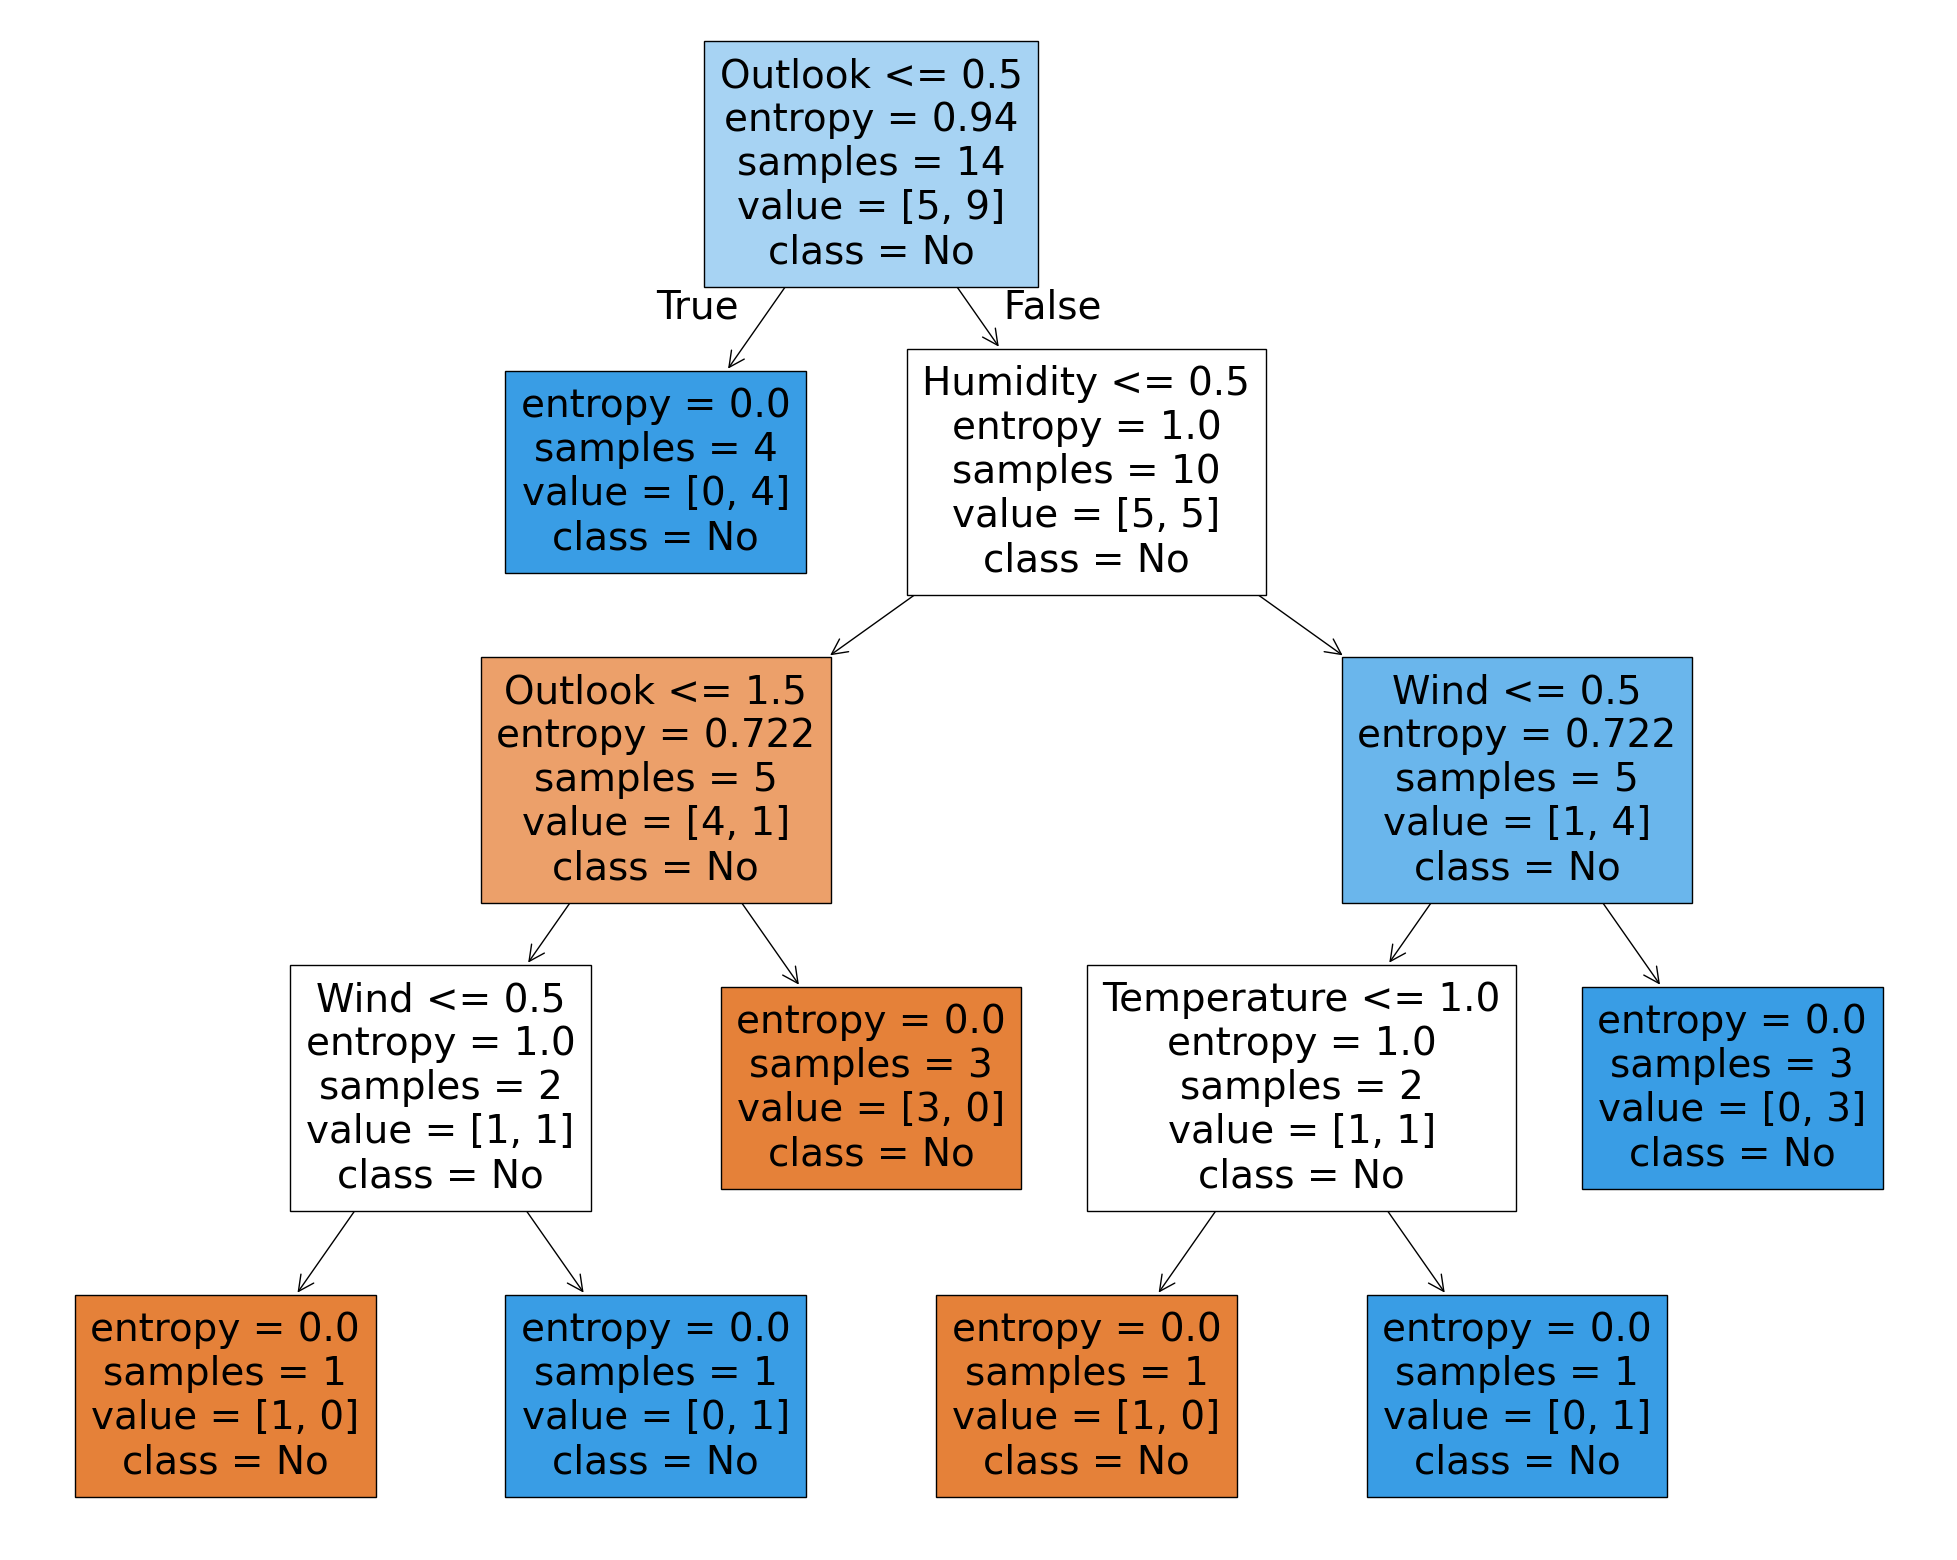

In [55]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=sai1.columns,
                   class_names=sai1['PlayGolf'],
                   filled=True)